In [136]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import plotly.plotly as py
import seaborn as sns
import math
from scipy.stats import norm, expon


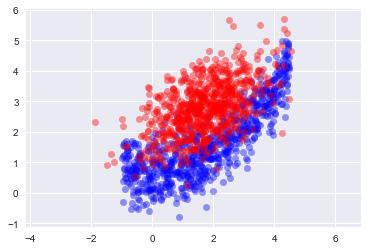

In [137]:
nbs = 750
mu = [1.7,2.8]
sig = np.array([5,4])
tt = 0.5
amin = -1
amax = 4.5
noise = 0.6

#X = np.random.normal(loc=mu, scale=sig)
cov = [[1,tt],[tt,0.8]]
x,y = np.random.multivariate_normal(mean=mu, cov=cov, size=nbs).T

x2 = np.random.uniform(amin, amax, size=nbs)
y2 = 0.7 + x2**2/6 + np.random.normal(loc=0, scale=noise, size=nbs)

plt.plot(x2,y2, 'o', color='blue', alpha=0.4)
plt.plot(x,y,'o',color='red', alpha=0.4)

plt.axis('equal')
plt.show()

In [138]:
aa = np.array([x,y,np.ones(nbs,)]).T

bb = np.array([x2,y2,np.zeros((nbs,))]).T

X = np.concatenate((aa,bb))
#xx.shape

mydf = pd.DataFrame(data=X, columns=['x1','x2','class'])
mydf.head()

,x1,x2,class
0,1.862384,1.797756,1.0
1,1.392439,2.853549,1.0
2,2.042326,2.730573,1.0
3,2.852344,2.279838,1.0
4,0.487427,2.129100,1.0


(array([   4.,   53.,  123.,  157.,  242.,  294.,  260.,  158.,  111.,   98.]),
 array([-1.88015699, -1.23622286, -0.59228874,  0.05164539,  0.69557952,
         1.33951365,  1.98344778,  2.62738191,  3.27131604,  3.91525017,
         4.5591843 ]),
 <a list of 10 Patch objects>)

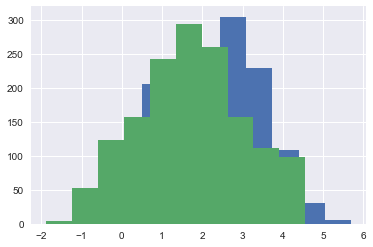

In [139]:
plt.hist(mydf.x2)
plt.hist(mydf.x1)

In [140]:
# split train/valid   
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         mydf.iloc[:,0:2], mydf.iloc[:,2], test_size=0.3, random_state=0)
X_train.head()
y_train.head()

519     1.0
1032    0.0
557     1.0
642     1.0
651     1.0
Name: class, dtype: float64

In [141]:
# logistic regression
from sklearn.linear_model import LogisticRegression as logreg

mylogreg = logreg(solver='lbfgs') # all other params to default
mylogreg.fit(X_train, y_train)
pred = mylogreg.predict(X_test)
# note: as with Perceptron, the predictions are 0 or 1
error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

# note that you can access the estimated probabilities
predprob = mylogreg.predict_proba(X_test)
print(predprob[1:10,:])


Misclass:  94
Misclass rate:  20.89 %
[[ 0.4808887   0.5191113 ]
 [ 0.7621189   0.2378811 ]
 [ 0.25987685  0.74012315]
 [ 0.88449846  0.11550154]
 [ 0.54116655  0.45883345]
 [ 0.35690028  0.64309972]
 [ 0.13935463  0.86064537]
 [ 0.01830854  0.98169146]
 [ 0.96702127  0.03297873]]


In [142]:

intercept = -1*mylogreg.intercept_[0]/mylogreg.coef_[0][1]
slope = -1*mylogreg.coef_[0][0]/mylogreg.coef_[0][1]
print("with log reg: x2 = ",intercept," + ", slope,"x1")

with log reg: x2 =  1.23794462498  +  0.566450564005 x1


In [143]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

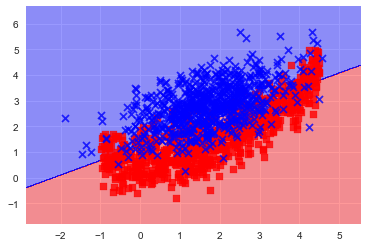

In [144]:
X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=mylogreg)

In [145]:
# as well, we'll create a standardised version of the input set 
#    for comparison of performances
from sklearn.preprocessing import StandardScaler

# note how this works: we first create a scaler object
#    that will hold the values (mean, std) for our data
#    for later reference
sc = StandardScaler()
# compute values of interest
sc.fit(X_train)
# apply the transformation
X_std_train = sc.transform(X_train)
X_std_test = sc.transform(X_test)
print(sc.mean_)

[ 1.7274637   2.22674095]


iter to convergence: 89
Misclass:  94
Misclass rate:  20.89 %


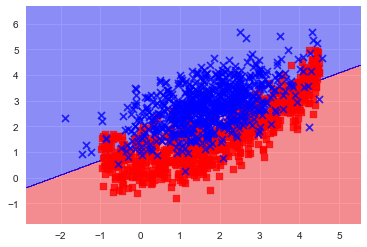

In [146]:
# neural network
# simple perceptron: only one neuron + output layer
from sklearn.neural_network import MLPClassifier as ann_
from sklearn.neural_network import MLPRegressor as ann

# this 'network' has two neurons: one hidden neuron (logistic) + one output layer (logistic as well)
simpleNN = ann_(hidden_layer_sizes=[1], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
simpleNN.fit(X_train, y_train)
pred = simpleNN.predict(X_test)

print('iter to convergence: %d' %simpleNN.n_iter_)

error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

#print(simpleNN.coefs_)
#print(simpleNN2.coefs_)

#aa = simpleNN.coefs_[1][0]
#print(1/(1+math.exp(aa)))

plot_decision_regions(X_combined,y_combined,classifier=simpleNN,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))

with threshold 0.9 , nb 1s = 63
Misclass rate:  37.11 %
with threshold 0.8 , nb 1s = 110
Misclass rate:  29.78 %
with threshold 0.7 , nb 1s = 150
Misclass rate:  24.89 %
with threshold 0.6 , nb 1s = 196
Misclass rate:  21.78 %
with threshold 0.5 , nb 1s = 228
Misclass rate:  21.33 %
with threshold 0.4 , nb 1s = 259
Misclass rate:  22.00 %
with threshold 0.3 , nb 1s = 287
Misclass rate:  24.22 %
with threshold 0.2 , nb 1s = 321
Misclass rate:  25.56 %
with threshold 0.1 , nb 1s = 378
Misclass rate:  35.11 %
with threshold 0.0 , nb 1s = 435
Misclass rate:  46.44 %


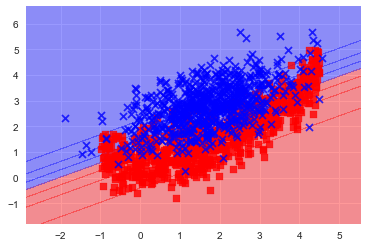

In [147]:
# now, this one has one hidden neuron (layer) + one linear output
#    drawback: the cost function is loess
simpleNN2 = ann(hidden_layer_sizes=[1], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
simpleNN2.fit(X_train, y_train)
out = simpleNN2.predict(X_test)
# note: we have to convert the predictions to binaries manually
v_error = [0]*10
for thr in range(1,11):
    tt = (out > 1-thr/10)
    print('with threshold %3.1f' %(1-thr/10), ', nb 1s = %d' %sum(tt))
    errortmp = (y_test != tt)
    print('Misclass rate: ', format(errortmp.sum()/errortmp.shape[0]*100, '4.2f'), '%')

#pred2 = (out>0.5)

#error2 = (y_test != pred2)
#print('With loess')
#print('Misclass: ', error2.sum())
#print('Misclass rate: ', format(error2.sum()/error2.shape[0]*100, '4.2f'), '%')

plot_decision_regions(X_combined,y_combined,classifier=simpleNN2,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))

In [148]:
# any difference for standardised input?

simpleNN.fit(X_std_train, y_train)
pred = simpleNN.predict(X_std_test)

simpleNN2.fit(X_std_train, y_train)
out = simpleNN2.predict(X_std_test)
pred2 = (out>0.5)

error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

error2 = (y_test != pred2)
print('With loess')
print('Misclass: ', error2.sum())
print('Misclass rate: ', format(error2.sum()/error2.shape[0]*100, '4.2f'), '%')

#print(simpleNN.coefs_)
#print(simpleNN2.coefs_)
#aa = simpleNN.coefs_[1][0]
#print(1/(1+math.exp(aa)))

print('number of examples predicted as 1: %d' %sum(pred2))
# at least we have something now ... 

for thr in range(1,11):
    tt = (out > 1-thr/10)
    print('with threshold %3.1f' %(1-thr/10), ', nb 1s = %d' %sum(tt))
    errortmp = (y_test != tt)
    print('Misclass rate: ', format(errortmp.sum()/errortmp.shape[0]*100, '4.2f'), '%')
# 0.5 is actually the best threshold here


Misclass:  93
Misclass rate:  20.67 %
With loess
Misclass:  96
Misclass rate:  21.33 %
number of examples predicted as 1: 228
with threshold 0.9 , nb 1s = 63
Misclass rate:  37.11 %
with threshold 0.8 , nb 1s = 110
Misclass rate:  29.78 %
with threshold 0.7 , nb 1s = 150
Misclass rate:  24.89 %
with threshold 0.6 , nb 1s = 196
Misclass rate:  21.78 %
with threshold 0.5 , nb 1s = 228
Misclass rate:  21.33 %
with threshold 0.4 , nb 1s = 259
Misclass rate:  22.00 %
with threshold 0.3 , nb 1s = 287
Misclass rate:  24.22 %
with threshold 0.2 , nb 1s = 321
Misclass rate:  25.56 %
with threshold 0.1 , nb 1s = 377
Misclass rate:  34.89 %
with threshold 0.0 , nb 1s = 435
Misclass rate:  46.44 %


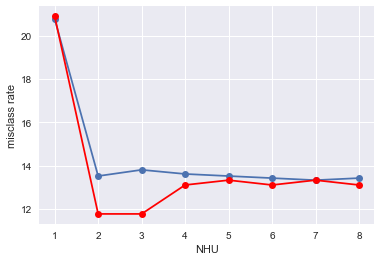

In [149]:

nmax = 8
v_train = [0]*nmax
v_error = [0]*nmax
for ii in range(1,nmax+1):
    NN = ann_(hidden_layer_sizes=[ii], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
    NN.fit(X_train, y_train)
    pred = NN.predict(X_train)
    etrain = (y_train != pred)
    v_train[ii-1] = (etrain.sum())/etrain.shape[0]*100
    pred = NN.predict(X_test)
    error = (y_test != pred)
    v_error[ii-1] = (error.sum())/error.shape[0]*100
#print(v_error)

import matplotlib.pyplot as plt

plt.plot(range(1,len(v_train)+1), v_train,marker='o')
plt.plot(range(1,len(v_error)+1), v_error,marker='o',c='red')
plt.xlabel('NHU')
plt.ylabel('misclass rate')
plt.show()

best architecture: 6 hidden units


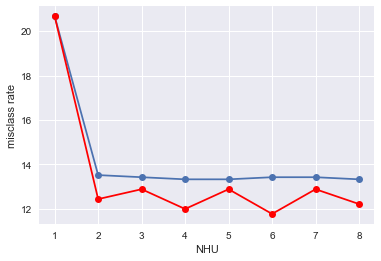

In [153]:
ntry = 5
v_train = [0]*nmax
v_error = [0]*nmax
emin_tot = 1500
for ii in range(1,nmax+1):
    emin = 1500
    #multiple init
    for _ in range(1,ntry+1):
        NN = ann_(hidden_layer_sizes=[ii], activation='logistic', solver='lbfgs', 
                   max_iter=100)
        NN.fit(X_train, y_train)
        pred = NN.predict(X_train)
        etrain = (y_train != pred)
        # keep if error smaller than previous
        if (etrain.sum() < emin):
            emin = etrain.sum()
            v_train[ii-1] = (etrain.sum())/etrain.shape[0]*100
            pred = NN.predict(X_test)
            error = (y_test != pred)
            v_error[ii-1] = (error.sum())/error.shape[0]*100
            if (error.sum()<emin_tot):
                emin_tot = error.sum()
                bestNN = NN
                bestNHU = ii
print('best architecture: %d hidden units' %bestNHU)

import matplotlib.pyplot as plt

plt.plot(range(1,len(v_train)+1), v_train,marker='o')
plt.plot(range(1,len(v_error)+1), v_error,marker='o',c='red')
plt.xlabel('NHU')
plt.ylabel('misclass rate')
plt.show()

iter to convergence: 101
Misclass:  59
Misclass rate:  13.11 %


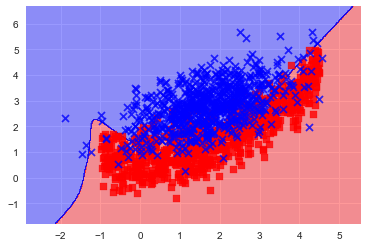

In [154]:
fullNN = ann_(hidden_layer_sizes=[bestNHU], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
fullNN.fit(X_train, y_train)
pred = fullNN.predict(X_test)

print('iter to convergence: %d' %fullNN.n_iter_)

error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')


plot_decision_regions(X_combined,y_combined,classifier=fullNN,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))

Misclass:  94
Misclass rate:  20.89 %
nb SV:  (505,)


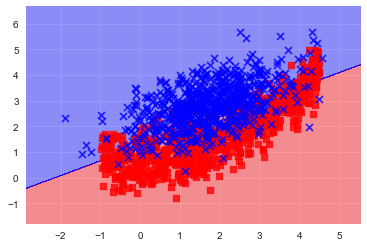

In [156]:
# carrying on ... SVM
# first: linear model - for comparison

from sklearn.svm import SVC #Support Vector Classifier

linsvm = SVC(kernel='linear')  # all defaults are good here
linsvm.fit(X_train, y_train)
pred = linsvm.predict(X_test)
# note: as with Perceptron, the predictions are 0 or 1
error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

# interesting feature of SVC: selection of input samples of interest 
#    the so-called 'support vectors'
print('nb SV: ', linsvm.support_.shape)

plot_decision_regions(X_combined,y_combined,classifier=linsvm,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))


Misclass:  60
Misclass rate:  13.33 %
nb SV:  (369,)


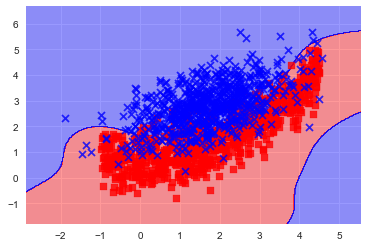

In [157]:
# now proper non linear SVM - RBF kernel

mysvm = SVC()  # all defaults are good here
mysvm.fit(X_train, y_train)
pred = mysvm.predict(X_test)
# note: as with Perceptron, the predictions are 0 or 1
error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

# interesting feature of SVC: selection of input samples of interest 
#    the so-called 'support vectors'
print('nb SV: ', mysvm.support_.shape)

plot_decision_regions(X_combined,y_combined,classifier=mysvm,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))


Misclass:  111
Misclass rate:  24.67 %
number of examples predicted as 1: 297


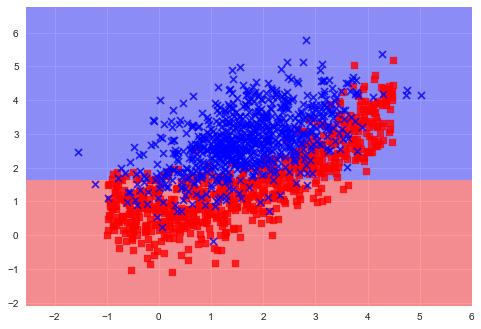

In [98]:
# decision tree
# note that here there is no need to standardise the variables
from sklearn.tree import DecisionTreeClassifier as dectree

# first: let's just try one node for comparison with above
myleaf = dectree(criterion='entropy', max_depth=1, random_state=0)

myleaf.fit(X_train,y_train)
pred = myleaf.predict(X_test)

error = (y_test != pred)
print('Misclass: ', error.sum())
print('Misclass rate: ', format(error.sum()/error.shape[0]*100, '4.2f'), '%')

print('number of examples predicted as 1: %d' %sum(pred))
#tt=range(y_train.shape[0],y_combined.shape[0]-1)
tt=np.arange(y_train.shape[0],y_combined.shape[0])
#print(tt)
plot_decision_regions(X_combined,y_combined,classifier=myleaf,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))

In [84]:
y_train.shape[0]

1050

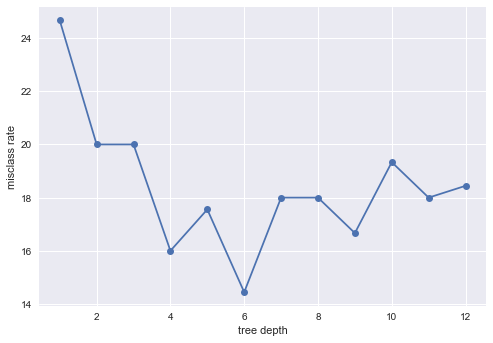

In [82]:
# let's see how the rate of misclass evolves with the depth

nmax = 12
v_error = [0]*nmax
for ii in range(1,nmax+1):
    mytree = dectree(criterion='entropy', max_depth=ii, random_state=0)
    mytree.fit(X_train,y_train)
    pred = mytree.predict(X_test)
    error = (y_test != pred)
    v_error[ii-1] = (error.sum())/error.shape[0]*100
    if (error.sum()<emin):
        emin = error.sum()
        bestdepth = ii
#print(v_error)

import matplotlib.pyplot as plt

plt.plot(range(1,len(v_error)+1), v_error,marker='o')
plt.xlabel('tree depth')
plt.ylabel('misclass rate')
plt.show()


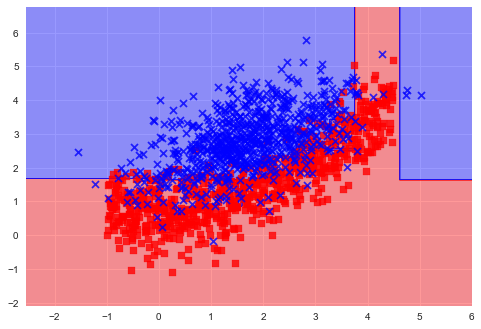

In [100]:
    mytree = dectree(criterion='entropy', max_depth=6, random_state=0)
    mytree.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=mytree,
                     test_idx=range(y_train.shape[0],y_combined.shape[0]-1))

In [54]:
# let's get down to work

# first level
lev1 = ann(hidden_layer_sizes=[1], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
lev1.fit(X_std_train, y_train)
outtrain = lev1.predict(X_std_train)
out = lev1.predict(X_std_test)
pred = (out>0.5)

# second level
lev21 = ann(hidden_layer_sizes=[1], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
lev21.fit(X_std_train[(outtrain>0.5),:], y_train[(outtrain>0.5)])
lev22 = ann(hidden_layer_sizes=[1], activation='logistic', solver='lbfgs', 
               max_iter=100, random_state=0)
lev21.fit(X_std_train[(outtrain<0.5),:], y_train[(outtrain<0.5)])

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[1], learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
print(myleaf.get_params)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')>
